In [150]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_df = pd.read_csv("./data/city_data.csv")
ride_df = pd.read_csv("./data/ride_data.csv")


In [151]:
city_df = pd.read_csv("./data/city_data.csv")
ride_df = pd.read_csv("./data/ride_data.csv")

In [152]:
combined_data_df = pd.merge(city_df, ride_df, on='city')
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [153]:
city_type = combined_data_df["type"].unique()
city_type

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [154]:
#Average Fare ($) Per City
#Total Number of Rides Per City
#total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

city = combined_data_df.groupby('city')
avg_fare = city.mean()['fare']
ride_count = city['ride_id'].count()
driver_count = city.mean()['driver_count']
city_type = city_df.set_index('city')['type']

city_data = pd.DataFrame({
    "Average Fare": avg_fare,
    "Number of Rides": ride_count,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

city_data.head()

,Average Fare,Number of Rides,Number of Drivers,Type of City
Amandaburgh,24.641667,18,12.0,Urban
Barajasview,25.332273,22,26.0,Urban
Barronchester,36.422500,16,11.0,Suburban
Bethanyland,32.956111,18,22.0,Suburban
Bradshawfurt,40.064000,10,7.0,Rural


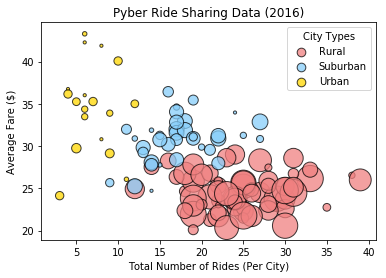

In [161]:
urban = city_data[city_data['Type of City'] == 'Urban']
suburban = city_data[city_data['Type of City'] == 'Suburban']
rural = city_data[city_data['Type of City'] == 'Rural']

colors = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': colors['Light Coral'], 'Suburban': colors['Light Sky Blue'], 'Rural': colors['Gold']}

plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

lgd = plt.legend(labels=('Rural','Suburban','Urban'), loc='best', title='City Types')
lgd.legendHandles[0]._sizes = [75]
lgd.legendHandles[1]._sizes = [75]
lgd.legendHandles[2]._sizes = [75]

plt.show()

In [162]:
city_type = combined_data_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

<function matplotlib.pyplot.show(*args, **kw)>

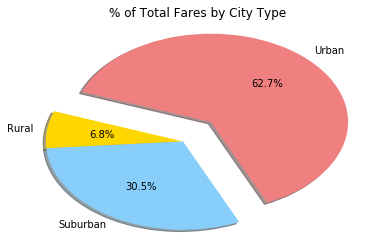

In [163]:
total_fare =  city_type.sum()['fare']

labels = total_fare.index
colors = ['gold','lightskyblue','lightcoral']
explode = [0 , 0, .3]

plt.pie(total_fare, startangle = 160, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True)

plt.title('% of Total Fares by City Type')
plt.axis('tight')
plt.show

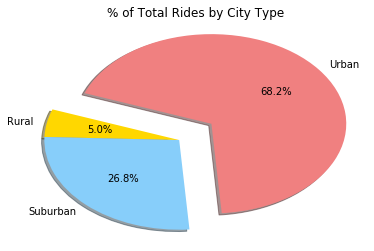

In [164]:
total_ride = city_type.sum()['ride_id']

labels = total_ride.index

plt.pie(total_ride, startangle = 160, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True)

plt.title('% of Total Rides by City Type')
plt.axis('tight')
plt.show()

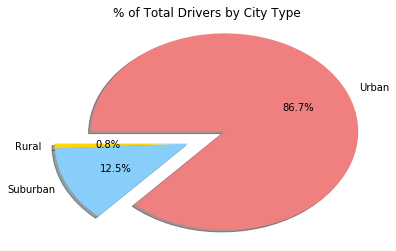

In [165]:
driver_total = city_type.sum()['driver_count']

labels = driver_total.index

plt.pie(driver_total, startangle = 180, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True)

plt.title('% of Total Drivers by City Type')
plt.axis('tight')
plt.show()
